<a href="https://colab.research.google.com/github/vitorkenzoo/Aula-Fiap/blob/main/Damos_lhe_as_boas_vindas_ao_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1
import pandas as pd
from google.colab import files

# Upload do arquivo
uploaded = files.upload()

# Carregar o dataset (com ; como separador e tratando ? como NaN)
df = pd.read_csv("household_power_consumption.txt", sep=";", na_values="?", low_memory=False)

# Exibir as 10 primeiras linhas
print(df.head(10))


Saving household_power_consumption.txt to household_power_consumption.txt
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   
5  16/12/2006  17:29:00                3.520                  0.522   235.02   
6  16/12/2006  17:30:00                3.702                  0.520   235.09   
7  16/12/2006  17:31:00                3.700                  0.520   235.22   
8  16/12/2006  17:32:00                3.668                  0.510   233.99   
9  16/12/2006  17:33:00                3.662                  0.510   233.86   

   Global_intensity  Sub_metering_1  Sub_mete

2.
Global_active_power

Representa a potência ativa consumida pela casa.

É a energia realmente usada para realizar trabalho útil: acender lâmpadas, aquecer, movimentar motores, carregar aparelhos, etc.

Unidade: kilowatt (kW).

É o que aparece na conta de luz que pagamos.



Global_reactive_power

Representa a potência reativa, que não realiza trabalho útil diretamente.

Está associada a campos elétricos e magnéticos de equipamentos indutivos/capacitivos (ex: motores, geladeiras, transformadores).

Ela “vai e volta” entre a fonte e os aparelhos, não é consumida de fato.

Unidade: kilovolt-ampere reativo (kVAR).

Apesar de não aparecer diretamente na conta residencial, em sistemas industriais/comerciais pode gerar cobrança extra (fator de potência baixo).

In [2]:
# 3 Verificar valores ausentes por coluna
missing_values = df.isnull().sum()

# Exibir resultado
print("Valores ausentes por coluna:")
print(missing_values)

# Total de valores ausentes no dataset
print("\nTotal de valores ausentes:", df.isnull().sum().sum())



Valores ausentes por coluna:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Total de valores ausentes: 181853


In [4]:
# 4
import pandas as pd

# Converter coluna Date para datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

# Criar nova coluna com o dia da semana
df["Weekday"] = df["Date"].dt.day_name(locale="en_US.utf8")

# Mostrar apenas as colunas relevantes
print(df[["Date", "Time", "Weekday"]].head(10))



        Date      Time   Weekday
0 2006-12-16  17:24:00  Saturday
1 2006-12-16  17:25:00  Saturday
2 2006-12-16  17:26:00  Saturday
3 2006-12-16  17:27:00  Saturday
4 2006-12-16  17:28:00  Saturday
5 2006-12-16  17:29:00  Saturday
6 2006-12-16  17:30:00  Saturday
7 2006-12-16  17:31:00  Saturday
8 2006-12-16  17:32:00  Saturday
9 2006-12-16  17:33:00  Saturday


In [22]:
#5
# Filtrar para o ano de 2007
df_2007 = df[df['Date'].dt.year == 2007].copy()

# Calcular a média diária de Global_active_power para 2007
daily_avg_power_2007 = df_2007.groupby(df_2007['Date'].dt.date)['Global_active_power'].mean()

# Exibir a média diária
print("Média de consumo diário de Global_active_power em 2007:")
print(daily_avg_power_2007)

# Calcular a somatória total do Global_active_power para o ano de 2007
total_power_2007 = df_2007['Global_active_power'].sum()

# Exibir o resultado
print(f"Somatória total do Global_active_power em 2007: {total_power_2007:.2f} kW")


Média de consumo diário de Global_active_power em 2007:
Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
                ...   
2007-12-27    1.758471
2007-12-28    2.161842
2007-12-29    2.290942
2007-12-30    1.777025
2007-12-31    1.539265
Name: Global_active_power, Length: 365, dtype: float64
Somatória total do Global_active_power em 2007: 582708.19 kW


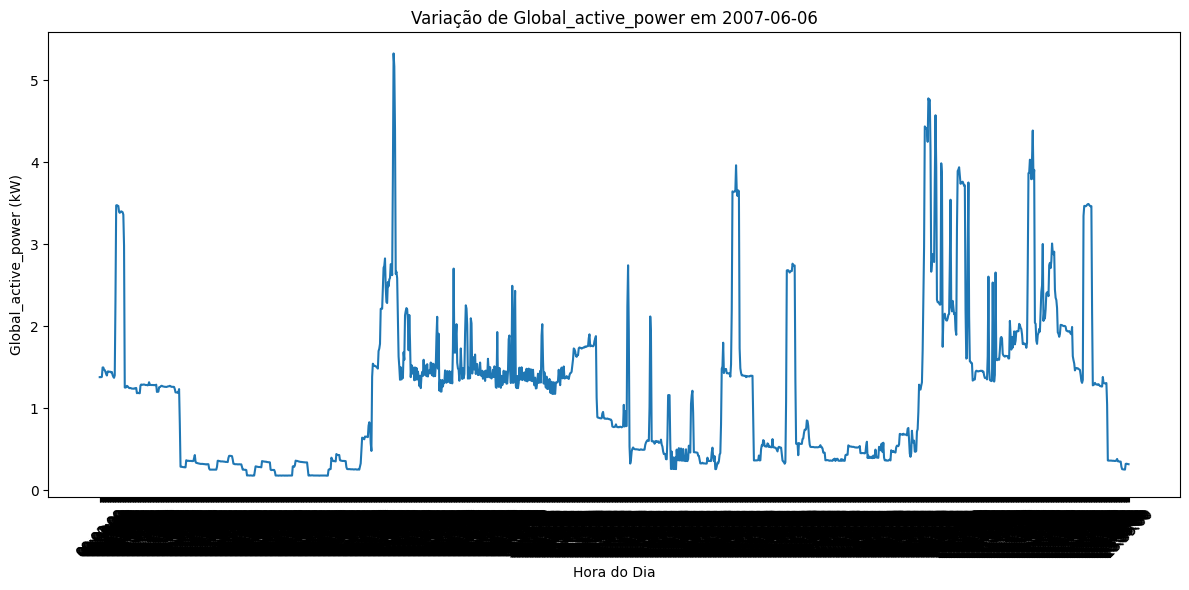

In [19]:
#6
import matplotlib.pyplot as plt
import seaborn as sns

# Escolha um dia para plotar (formato: 'AAAA-MM-DD')
data_escolhida = '2007-06-06' # Você pode mudar esta data

# Filtrar os dados para o dia escolhido
df_dia_escolhido = df[df['Date'] == data_escolhida].copy()

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_dia_escolhido, x='Time', y='Global_active_power')
plt.title(f'Variação de Global_active_power em {data_escolhida}')
plt.xlabel('Hora do Dia')
plt.ylabel('Global_active_power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

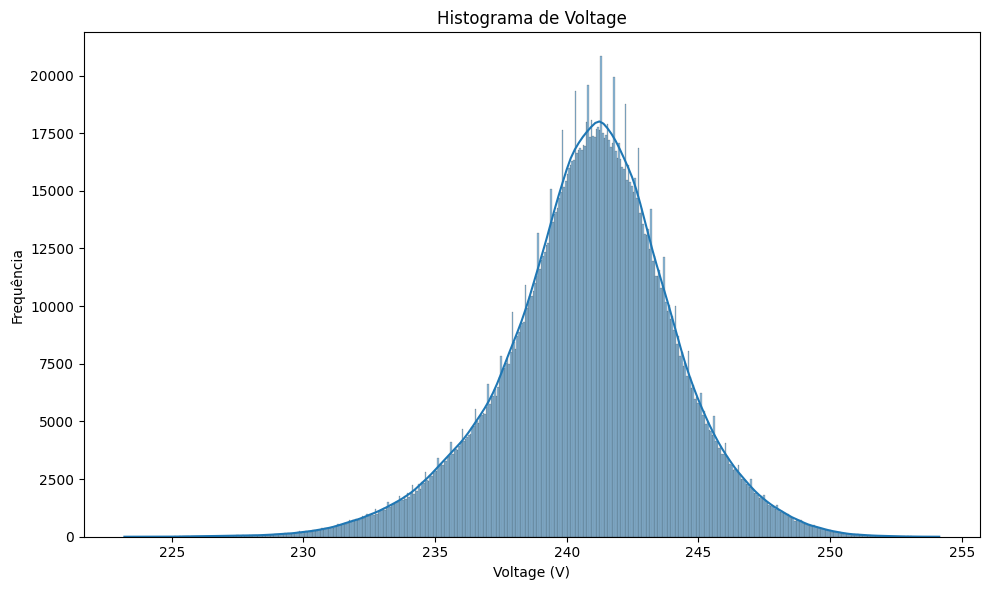

In [13]:
#7
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o histograma da variável Voltage
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Voltage', kde=True)
plt.title('Histograma de Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

#a maioria das medições está concentrada em torno de 240 Volts,
#com a distribuição parecendo ser simétrica e com um pico principal nessa faixa.
# Isso indica que a tensão na residência é relativamente estável.

In [30]:
#8
# Criar uma coluna para o mês e ano
df['Month_Year'] = df['Date'].dt.to_period('M')

# Calcular o consumo médio por mês
monthly_avg_power = df.groupby('Month_Year')['Global_active_power'].mean()

# Exibir o resultado
print("Consumo médio mensal de Global_active_power:")
print(monthly_avg_power)

Consumo médio mensal de Global_active_power:
Month_Year
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
2007-12    1.626474
2008-01    1.459920
2008-02    1.181384
2008-03    1.245337
2008-04    1.115972
2008-05    1.024281
2008-06    0.994096
2008-07    0.794781
2008-08    0.276488
2008-09    0.987680
2008-10    1.136768
2008-11    1.387066
2008-12    1.275189
2009-01    1.410202
2009-02    1.247568
2009-03    1.226735
2009-04    1.140690
2009-05    1.012856
2009-06    0.840756
2009-07    0.618121
2009-08    0.664619
2009-09    0.986841
2009-10    1.144486
2009-11    1.274743
2009-12    1.364421
2010-01    1.430525
2010-02    1.375855
2010-03    1.130075
2010-04    1.027295
2010-05    1.095284
2010-06    0.969615
2010-07    0.721068
2010-08    0.590778
2010-09    0.956442
2010-10    1.163399
2010

In [25]:
#9
# Calcular a somatória diária de Global_active_power
daily_total_power = df.groupby(df['Date'].dt.date)['Global_active_power'].sum()

# Encontrar o dia com o maior consumo
dia_maior_consumo = daily_total_power.idxmax()
valor_maior_consumo = daily_total_power.max()

# Exibir o resultado
print(f"O dia com o maior consumo de Global_active_power foi {dia_maior_consumo} com um total de {valor_maior_consumo:.2f} kW.")

O dia com o maior consumo de Global_active_power foi 2006-12-23 com um total de 4773.39 kW.


In [28]:
#10
# Mapear os dias da semana para "Dia de Semana" ou "Fim de Semana"
weekday_map = {
    'Monday': 'Dia de Semana',
    'Tuesday': 'Dia de Semana',
    'Wednesday': 'Dia de Semana',
    'Thursday': 'Dia de Semana',
    'Friday': 'Dia de Semana',
    'Saturday': 'Fim de Semana',
    'Sunday': 'Fim de Semana'
}
df['Day_Type'] = df['Weekday'].map(weekday_map)

# Calcular o consumo médio por tipo de dia (dia de semana vs final de semana)
avg_power_by_day_type = df.groupby('Day_Type')['Global_active_power'].mean()

# Exibir o resultado
print("Consumo médio de Global_active_power por tipo de dia:")
print(avg_power_by_day_type)

Consumo médio de Global_active_power por tipo de dia:
Day_Type
Dia de Semana    1.035472
Fim de Semana    1.234232
Name: Global_active_power, dtype: float64


In [31]:
#11
# Selecionar as colunas de interesse
colunas_correlacao = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_correlacao = df[colunas_correlacao]

# Calcular a matriz de correlação
matriz_correlacao = df_correlacao.corr()

# Exibir a matriz de correlação
print("Matriz de Correlação:")
print(matriz_correlacao)

Matriz de Correlação:
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


In [32]:
#12
# Criar a nova variável Total_Sub_metering
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

# Exibir as primeiras linhas do DataFrame com a nova coluna
print(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head())

   Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_metering
0             0.0             1.0            17.0                18.0
1             0.0             1.0            16.0                17.0
2             0.0             2.0            17.0                19.0
3             0.0             1.0            17.0                18.0
4             0.0             1.0            17.0                18.0


In [35]:
#13
# Calcular a somatória mensal de Total_Sub_metering
monthly_total_sub_metering = df.groupby('Month_Year')['Total_Sub_metering'].sum()

# Calcular a média mensal de Global_active_power (já calculada anteriormente, mas recalculando para garantir)
monthly_avg_power = df.groupby('Month_Year')['Global_active_power'].mean()

# Comparar a somatória mensal de Total_Sub_metering com a média mensal de Global_active_power
meses_ultrapassaram = monthly_total_sub_metering[monthly_total_sub_metering > monthly_avg_power]

# Exibir os meses em que Total_Sub_metering ultrapassa a média de Global_active_power
if not meses_ultrapassaram.empty:
    print("Meses em que a somatória de Total_Sub_metering ultrapassa a média de Global_active_power:")
    print(meses_ultrapassaram)
else:
    print("Não há meses em que a somatória de Total_Sub_metering ultrapassa a média de Global_active_power.")

Meses em que a somatória de Total_Sub_metering ultrapassa a média de Global_active_power:
Month_Year
2006-12    239123.0
2007-01    465285.0
2007-02    382462.0
2007-03    455892.0
2007-04    269998.0
2007-05    377317.0
2007-06    318462.0
2007-07    253600.0
2007-08    311404.0
2007-09    354493.0
2007-10    387212.0
2007-11    424179.0
2007-12    519444.0
2008-01    436847.0
2008-02    352756.0
2008-03    422057.0
2008-04    413629.0
2008-05    402611.0
2008-06    422280.0
2008-07    318957.0
2008-08    105802.0
2008-09    381248.0
2008-10    383208.0
2008-11    394569.0
2008-12    391912.0
2009-01    477209.0
2009-02    393948.0
2009-03    441769.0
2009-04    414947.0
2009-05    404717.0
2009-06    321132.0
2009-07    248690.0
2009-08    264304.0
2009-09    394293.0
2009-10    435962.0
2009-11    449447.0
2009-12    495200.0
2010-01    506368.0
2010-02    514572.0
2010-03    420313.0
2010-04    410763.0
2010-05    465108.0
2010-06    420356.0
2010-07    244938.0
2010-08    199671.0

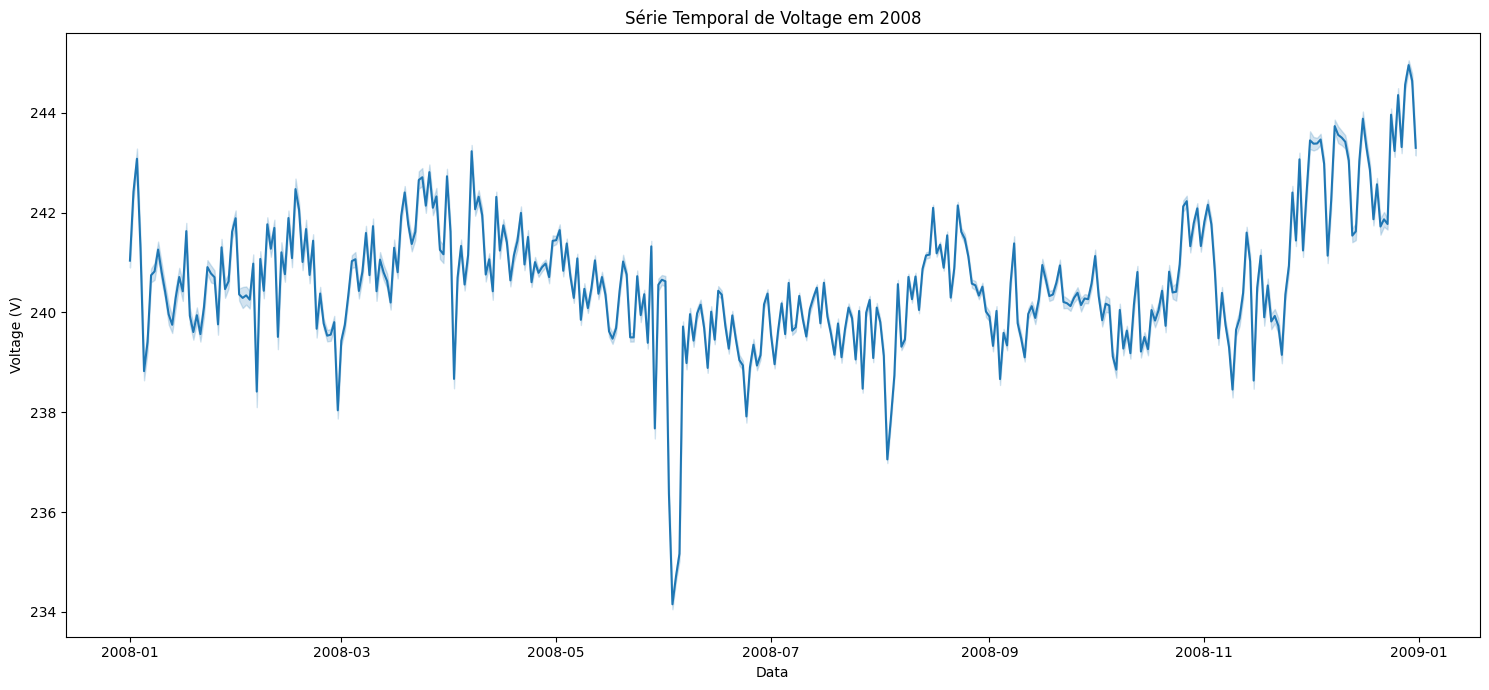

In [39]:
#14
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os dados para o ano de 2008
df_2008 = df[df['Date'].dt.year == 2008].copy()

# Criar o gráfico de  2008
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_2008, x='Date', y='Voltage')
plt.title('Série Temporal de Voltage em 2008')
plt.xlabel('Data')
plt.ylabel('Voltage (V)')
plt.tight_layout()
plt.show()

In [43]:
#15
# Definir os meses de verão e inverno (hemisfério sul - Brasil)
verao_meses = [12, 1, 2]  # Dezembro, Janeiro, Fevereiro
inverno_meses = [6, 7, 8] # Junho, Julho, Agosto

# Criar colunas para o mês e ano, se ainda não existirem
if 'Month_Year' not in df.columns:
    df['Month_Year'] = df['Date'].dt.to_period('M')

# Extrair o número do mês
df['Month'] = df['Date'].dt.month

# Filtrar os dados para os meses de verão e inverno
df_verao = df[df['Month'].isin(verao_meses)].copy()
df_inverno = df[df['Month'].isin(inverno_meses)].copy()

# Calcular o consumo médio nos meses de verão
media_verao = df_verao['Global_active_power'].mean()

# Calcular o consumo médio nos meses de inverno
media_inverno = df_inverno['Global_active_power'].mean()

# Exibir os resultados
print(f"Consumo médio de Global_active_power nos meses de verão (Brasil): {media_verao:.2f} kW")
print(f"Consumo médio de Global_active_power nos meses de inverno (Brasil): {media_inverno:.2f} kW")

Consumo médio de Global_active_power nos meses de verão (Brasil): 1.42 kW
Consumo médio de Global_active_power nos meses de inverno (Brasil): 0.73 kW


In [59]:
#17
from sklearn.preprocessing import MinMaxScaler

# Identificar as variáveis numéricas principais para normalização
# Excluindo colunas de data/tempo e as sub-medições, que podem ter um tratamento diferente dependendo do objetivo
colunas_numericas_principais = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a normalização
# Fit e transform nas colunas selecionadas
df[colunas_numericas_principais] = scaler.fit_transform(df[colunas_numericas_principais])

# Exibir as primeiras linhas do DataFrame com as colunas normalizadas
print("DataFrame com variáveis numéricas principais normalizadas (Min-Max Scaling):")
print(df[colunas_numericas_principais].head())

DataFrame com variáveis numéricas principais normalizadas (Min-Max Scaling):
   Global_active_power  Global_reactive_power   Voltage  Global_intensity
0             0.000000               0.000000  1.000000               0.0
1             0.976109               0.214286  0.219355               1.0
2             0.988055               0.952381  0.000000               1.0
3             1.000000               1.000000  0.290323               1.0
